Gradiente descendente é um dos algoritmos de otimização mais populares e amplamente utilizado, principalmente em otimização de redes neurais. O algoritmo busca encontrar o mínimo de uma função
J
(
β
)
 de forma iterativa, em que
β
 são os parâmetros do modelo. A ideia consiste em atualizar os parâmetros na direção oposta do gradiente
∇
β
J
(
β
)
 em relação aos parâmetros, ou seja, seguimos a direção da inclinação da região de resposta criada, em busca de um vale. Em sua forma mais simples, o algoritmo é definido como:

 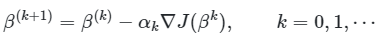

 Em que
β
(
k
)
 são os valores do vetor de parâmetros no passo
k
,
α
 é a taxa de aprendizado (learning rate) e
∇
β
J
(
β
)
 é o gradiente da função de custo
L
(
⋅
)
, ou seja, o vetor de derivadas parciais em relação aos parâmetros
β
. A taxa de aprendizado
α
 determina o tamanho do passo em cada atualização, visando atingir o mínimo (local).

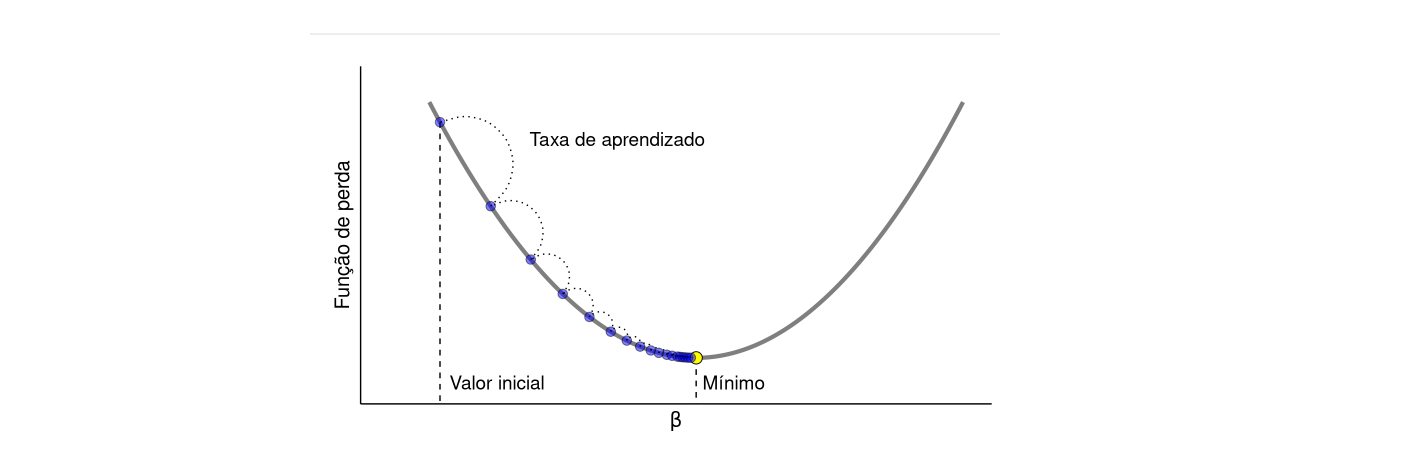

Com uma taxa de aprendizado muito pequena são necessários muitas iterações para encontrar o mínimo. Todavia, caso a taxa de aprendizado seja muito grande, você pode acabar “pulando” o ponto de mínimo desejado.

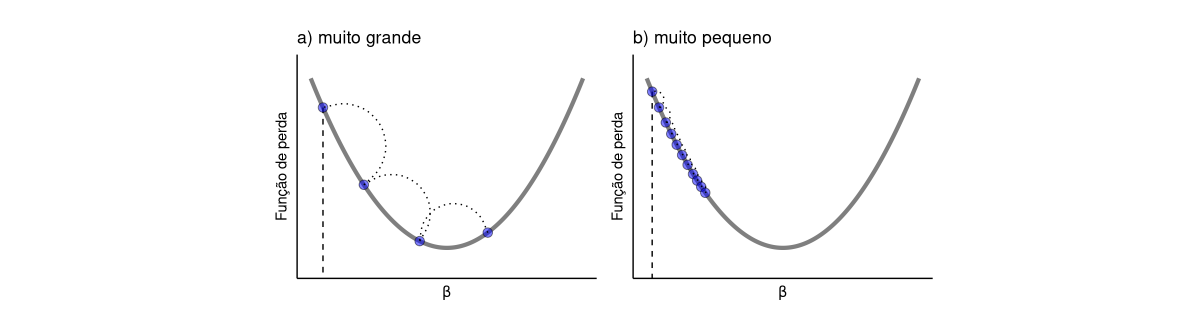

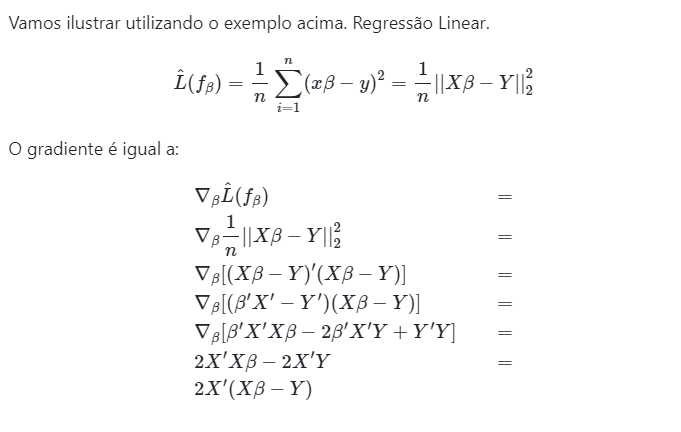

- **No lugar do 2 é 1/n**

- Base de dados que mostra informações de pessoas e quanto elas custaram ao plano de saúde

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv("/content/drive/MyDrive/Otimização/insurance_treino.csv", sep=';')
df

,age,sex,bmi,children,smoker,region,charges
0,34,female,"23,56",0,no,northeast,"4992,3764"
1,45,female,"33,1",0,no,southwest,"7345,084"
2,23,male,"32,7",3,no,southwest,"3591,48"
3,38,female,"19,95",2,no,northeast,"7133,9025"
4,32,female,"29,8",2,no,southwest,"5152,134"
...,...,...,...,...,...,...,...
995,49,female,"21,3",1,no,southwest,"9182,17"
996,25,female,"34,485",0,no,northwest,"3021,80915"
997,18,female,"38,17",0,no,southeast,"1631,6683"
998,28,male,"31,68",0,yes,southeast,"34672,1472"


##Transoformando todas as informações de string para números

In [22]:
sex = {'male': 1, 'female': 0}
df['sex'] = df['sex'].map(sex)

In [23]:
smoker = {'yes': 1, 'no': 0}
df['smoker'] = df['smoker'].map(smoker)

In [24]:
X_mat = df[['age', 'sex', 'children', 'smoker']].values

In [25]:
y = df['charges'].str.replace(',', '.').astype(float).values

In [26]:
X_mat  = np.column_stack((np.ones(X_mat.shape[0]), X_mat))
X_mat

array([[ 1., 34.,  0.,  0.,  0.],
       [ 1., 45.,  0.,  0.,  0.],
       [ 1., 23.,  1.,  3.,  0.],
       ...,
       [ 1., 18.,  0.,  0.,  0.],
       [ 1., 28.,  1.,  0.,  1.],
       [ 1., 61.,  0.,  4.,  0.]])

Solução Analítica = $\hat{\beta} = (x'x)^{-1}x'y$

In [27]:
# # Define X' and X'X
X_t = X_mat.T
X_tX = X_t @ X_mat

##Aplicando o gradiente
Gradiente = $ \frac1n x'(x\beta - y) $

$\beta^{(k+1)} = \beta^{(k+1)} - \alpha \frac{1}{(n)}x'(x\beta^{(k)} - y) $

In [28]:
def grad(X, y, beta):
  n = len(y)
  error = X @ beta - y
  gradient =X.T @ error / n
  return gradient

In [32]:
beta = np.zeros(5)
betas = [beta]
lr = 0.001
n_iter = 10000

In [33]:
for i in range(n_iter):
  gradient = grad(X_mat, y, betas[-1])
  beta = betas[-1] - lr * gradient
  betas.append(beta)

In [34]:
k = 10000
x1 = np.random.uniform(-5, 5, k)
y1 = 3 + x1 + np.random.normal(size = k)

X = np.column_stack((np.ones(k), x1))

n_iter = 1000
beta = np.zeros(2)
betas = [beta]
lr = 0.01

for i in range(n_iter):
  gradient = grad(X, y1, betas[-1])
  beta = betas[-1] - lr * gradient
  betas.append(beta)

In [35]:
beta_values = np.array(betas)
print(f"Valores de beta ao longo das iterações: {beta_values}")

Valores de beta ao longo das iterações: [[0.         0.        ]
 [0.03024576 0.08391481]
 [0.06016993 0.16082605]
 ...
 [3.00168709 0.99822664]
 [3.00168841 0.99822664]
 [3.00168972 0.99822664]]


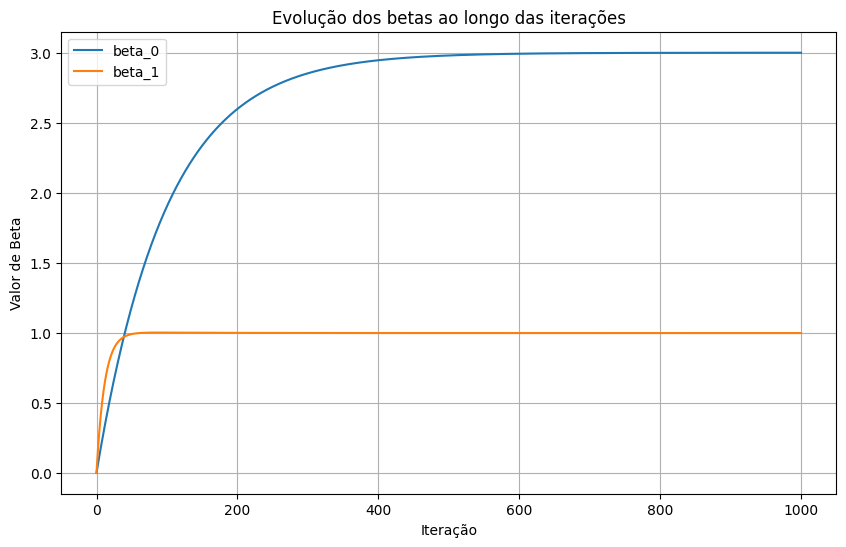

In [37]:
plt.figure(figsize=(10,6))
for i in range(beta_values.shape[1]):
  plt.plot(beta_values[:, i], label = f'beta_{i}')

plt.title("Evolução dos betas ao longo das iterações")
plt.xlabel('Iteração')
plt.ylabel('Valor de Beta')
plt.legend()
plt.grid(True)
plt.show()

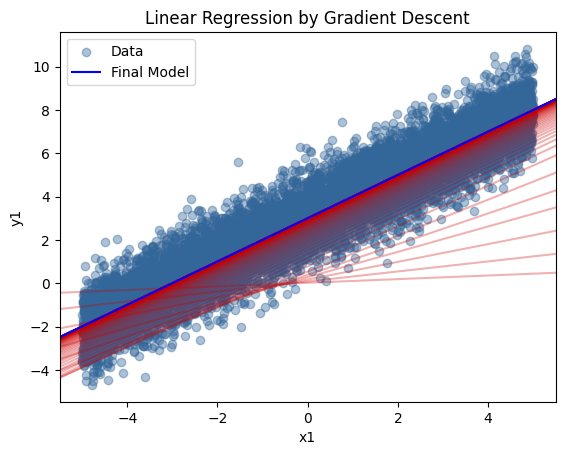

In [38]:
plt.figure()
plt.scatter(x1, y1, color = (0.2, 0.4, 0.6, 0.4), label = 'Data')
for i in [1,3,6,10,14] + list(range(20, n_iter, 10)):
  plt.axline(xy1 = (0, betas[i][0]), slope = betas[i][1], color = (0.8,0,0,0.3))
plt.axline(xy1=(0, betas[-1][0]), slope=betas[-1][1], color='blue', label='Final Model')
plt.title('Linear Regression by Gradient Descent')
plt.xlabel('x1')
plt.ylabel('y1')
plt.legend()